In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx

import matplotlib.pyplot as plt

from gglasso.problem import glasso_problem
#from gglasso.helper.data_generation import generate_precision_matrix, group_power_network, sample_covariance_matrix
from gglasso.helper.basic_linalg import adjacency_matrix

In [2]:
with open('../data/est_original.pkl', 'rb') as f:
    est = pickle.load(f)

In [3]:
est['R']

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,-0.820123,-0.819221,-0.820123,-0.819221,-0.851189,0.431472,-0.820223,0.423523,0.440937,...,-0.882302,-0.000095,-0.820049,-0.820114,0.297138,-0.882407,-0.882059,-0.882387,-0.882337,-0.820204
1,-0.820123,1.000000,-0.819221,-0.820123,-0.819221,-0.851189,-0.820258,-0.820211,-0.819215,-0.882424,...,-0.882395,-0.116457,-0.820162,-0.820066,-0.882426,-0.882375,0.009053,-0.882403,0.322973,-0.819313
2,-0.819221,-0.819221,1.000000,-0.819221,-0.822439,-0.851431,-0.884339,-0.884336,-0.822433,0.320598,...,-0.882242,0.231033,-0.819259,-0.819360,-0.882378,-0.882391,0.426142,-0.851479,-0.882225,-0.819197
3,-0.820123,-0.820123,-0.819221,1.000000,-0.819221,-0.851239,-0.820223,-0.820236,0.422952,0.304276,...,-0.882314,0.153578,-0.820101,0.393883,-0.882360,-0.882415,-0.882043,-0.882371,-0.882313,-0.820155
4,-0.819221,-0.819221,-0.822439,-0.819221,1.000000,-0.882194,-0.884341,-0.884332,-0.822442,-0.882475,...,-0.883370,0.172736,-0.819239,0.409500,-0.882374,-0.883047,0.026996,-0.882327,-0.882198,-0.819175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.882407,-0.882375,-0.882391,-0.882415,-0.883047,-0.883299,-0.882164,-0.882295,-0.883530,-0.883563,...,-0.883325,-0.229122,-0.882389,-0.882483,-0.883684,1.000000,-0.883756,0.203279,-0.883283,-0.882418
196,-0.882059,0.009053,0.426142,-0.882043,0.026996,-0.086968,-0.884538,-0.884486,0.153536,0.226036,...,0.154500,0.210721,0.009054,0.198403,0.215270,-0.883756,1.000000,0.269321,0.023983,-0.882057
197,-0.882387,-0.882403,-0.851479,-0.882371,-0.882327,-0.883306,-0.882291,-0.882185,0.462387,0.414183,...,-0.883367,0.082495,-0.882375,-0.882499,0.191860,0.203279,0.269321,1.000000,-0.883316,-0.882362
198,-0.882337,0.322973,-0.882225,-0.882313,-0.882198,-0.883073,-0.882099,-0.882088,-0.882188,-0.883284,...,-0.883151,0.069066,-0.882297,-0.882305,-0.883443,-0.883283,0.023983,-0.883316,1.000000,0.460833


In [4]:
N = 5964
S = est['R'].to_numpy()

In [13]:
P = glasso_problem(S, N, reg_params = {'lambda1': 0.05}, latent = False, do_scaling = False)
print(P)

 
SINGLE GRAPHICAL LASSO PROBLEM 
Regularization parameters:
{'lambda1': 0.05, 'mu1': None}


In [15]:
np.logspace(0, -2, 11)[1:]

array([0.63095734, 0.39810717, 0.25118864, 0.15848932, 0.1       ,
       0.06309573, 0.03981072, 0.02511886, 0.01584893, 0.01      ])

In [21]:
np.arange(0.01, 1, 0.1)[::-1]

array([0.91, 0.81, 0.71, 0.61, 0.51, 0.41, 0.31, 0.21, 0.11, 0.01])

In [22]:
lambda1_range = np.arange(0.01, 1, 0.1)[::-1]
modelselect_params = {'lambda1_range': lambda1_range}

P.model_selection(modelselect_params = modelselect_params, method = 'eBIC', gamma = 0.1)

# regularization parameters are set to the best ones found during model selection
print(P.reg_params)

ADMM terminated after 20 iterations with status: optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: max iterations reached.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
{'lambda1': 0.91, 'mu1': 0}


Text(0.5, 1.0, 'Recovered precision matrix')

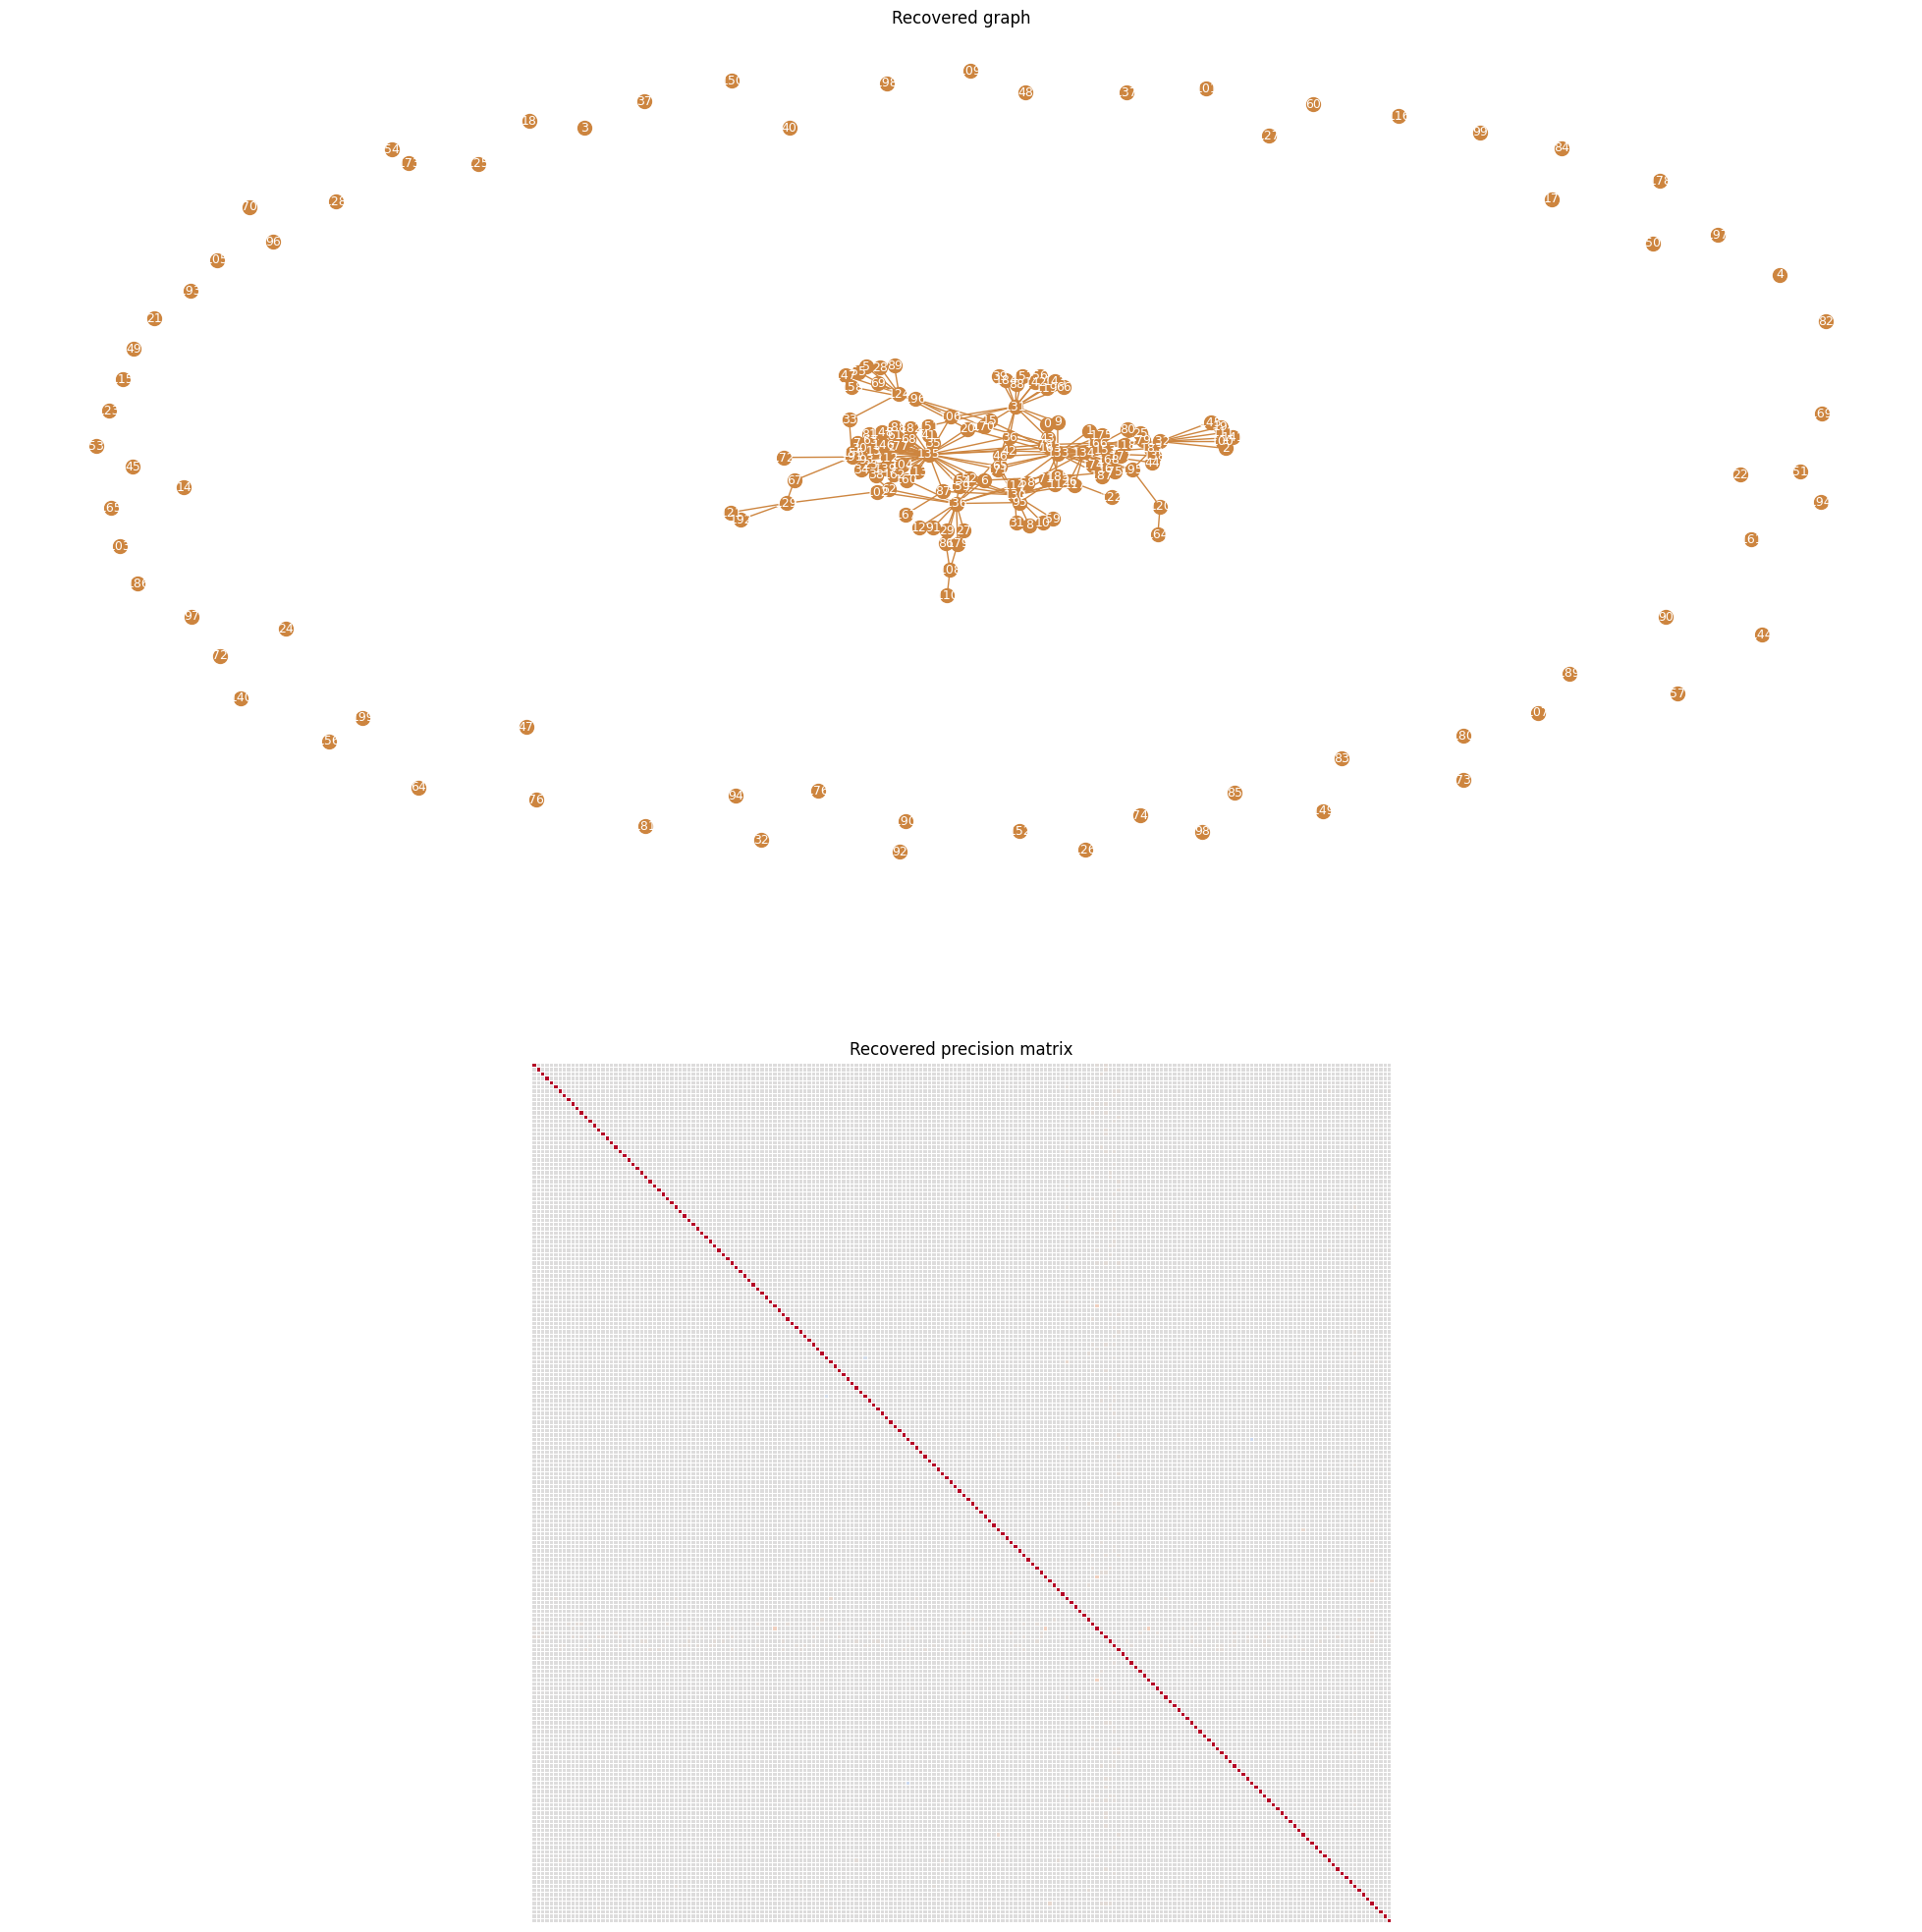

In [27]:
#tmp = P.modelselect_stats

sol = P.solution.precision_
P.solution.calc_adjacency(t = 1e-4)


fig, axs = plt.subplots(2, figsize=(25,25))
node_size = 100
font_size = 9


G1 = nx.from_numpy_array(P.solution.adjacency_)
pos = nx.drawing.layout.spring_layout(G1, seed = 1234)

nx.draw_networkx(G1, pos = pos, node_size = node_size, node_color = "peru", edge_color = "peru", \
               font_size = font_size, font_color = 'white', with_labels = True, ax = axs[0])
axs[0].axis('off')
axs[0].set_title("Recovered graph")


sns.heatmap(sol, cmap = "coolwarm", vmin = -0.5, vmax = 0.5, linewidth = .5, square = True, cbar = False, \
            xticklabels = [], yticklabels = [], ax = axs[1])
axs[1].set_title("Recovered precision matrix")

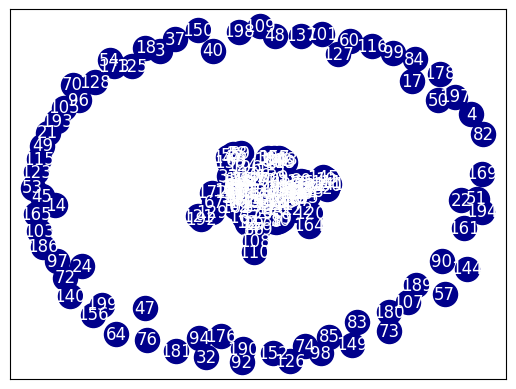

In [24]:
plt.figure()
nx.draw_networkx(G1, pos = pos, node_color = "darkblue", edge_color = "darkblue", font_color = 'white', with_labels = True)


In [103]:
adj = P.solution.adjacency_
mask = np.all(adj == 0, axis=1)

In [109]:
np.where(mask)

(array([  3,   4,  14,  17,  18,  21,  22,  24,  32,  37,  40,  45,  47,
         48,  49,  50,  51,  53,  54,  57,  60,  64,  70,  72,  73,  74,
         76,  82,  83,  84,  85,  90,  92,  94,  96,  97,  98,  99, 101,
        103, 105, 107, 109, 115, 116, 123, 125, 126, 127, 128, 137, 140,
        144, 149, 150, 152, 156, 161, 165, 169, 173, 176, 178, 180, 181,
        186, 189, 190, 193, 194, 197, 198, 199], dtype=int64),)

In [98]:
G2 = nx.from_numpy_array(adj)

In [99]:
G2.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199))

In [101]:
G2.size()

172

In [110]:
G2.remove_nodes_from(np.where(mask)[0])

In [114]:
G2.nodes

NodeView((0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 19, 20, 23, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 38, 39, 41, 42, 43, 44, 46, 52, 55, 56, 58, 59, 61, 62, 63, 65, 66, 67, 68, 69, 71, 75, 77, 78, 79, 80, 81, 86, 87, 88, 89, 91, 93, 95, 100, 102, 104, 106, 108, 110, 111, 112, 113, 114, 117, 118, 119, 120, 121, 122, 124, 129, 130, 131, 132, 133, 134, 135, 136, 138, 139, 141, 142, 143, 145, 146, 147, 148, 151, 153, 154, 155, 157, 158, 159, 160, 162, 163, 164, 166, 167, 168, 170, 171, 172, 174, 175, 177, 179, 182, 183, 184, 185, 187, 188, 191, 192, 195, 196))

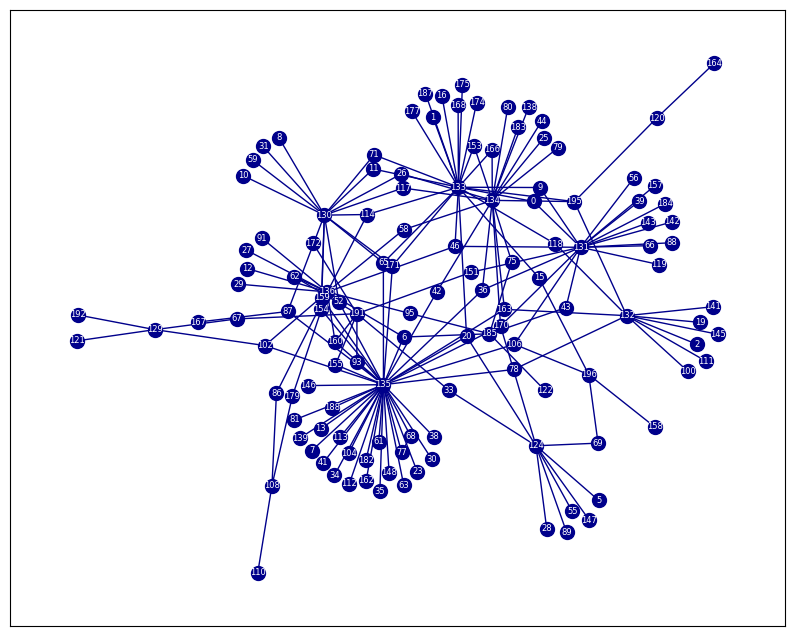

In [126]:
pos = nx.drawing.layout.spring_layout(G2, seed = 1234)

plt.figure(figsize=(10,8))
nx.draw_networkx(G2, pos = pos, node_size = node_size, node_color = "darkblue", edge_color = "darkblue", font_color = 'white', font_size = font_size-3, with_labels = True)

In [131]:
with open('../data/est_pd_original.pkl', 'rb') as f:
    est_pd = pickle.load(f)

In [132]:
N = 5964
S = est_pd['R'].to_numpy()

P = glasso_problem(S, N, reg_params = {'lambda1': 0.05}, latent = False, do_scaling = False)
print(P)

 
SINGLE GRAPHICAL LASSO PROBLEM 
Regularization parameters:
{'lambda1': 0.05, 'mu1': None}


In [133]:
#lambda1_range = np.arange(0.01, 1, 0.1)[::-1]
lambda1_range = np.logspace(0, -3, 30)
modelselect_params = {'lambda1_range': lambda1_range}

P.model_selection(modelselect_params = modelselect_params, method = 'eBIC', gamma = 0.1)

# regularization parameters are set to the best ones found during model selection
print(P.reg_params)

ADMM terminated after 12 iterations with status: optimal.
ADMM terminated after 12 iterations with status: optimal.
ADMM terminated after 11 iterations with status: optimal.
ADMM terminated after 12 iterations with status: optimal.
ADMM terminated after 12 iterations with status: optimal.
ADMM terminated after 12 iterations with status: optimal.
ADMM terminated after 11 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 23 iterations with status: optimal.
ADMM terminated after 12 iterations with status: optimal.
ADMM terminated after 23 iterations with status: optimal.
ADMM terminated after 15 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 24 iterations with status: optimal.
ADMM terminated after 24 iterations with status: optimal.
ADMM terminated after 26 iterations with status: optimal.
ADMM terminated after 27 iterations with status: optimal.
ADMM terminate

Text(0.5, 1.0, 'Recovered precision matrix')

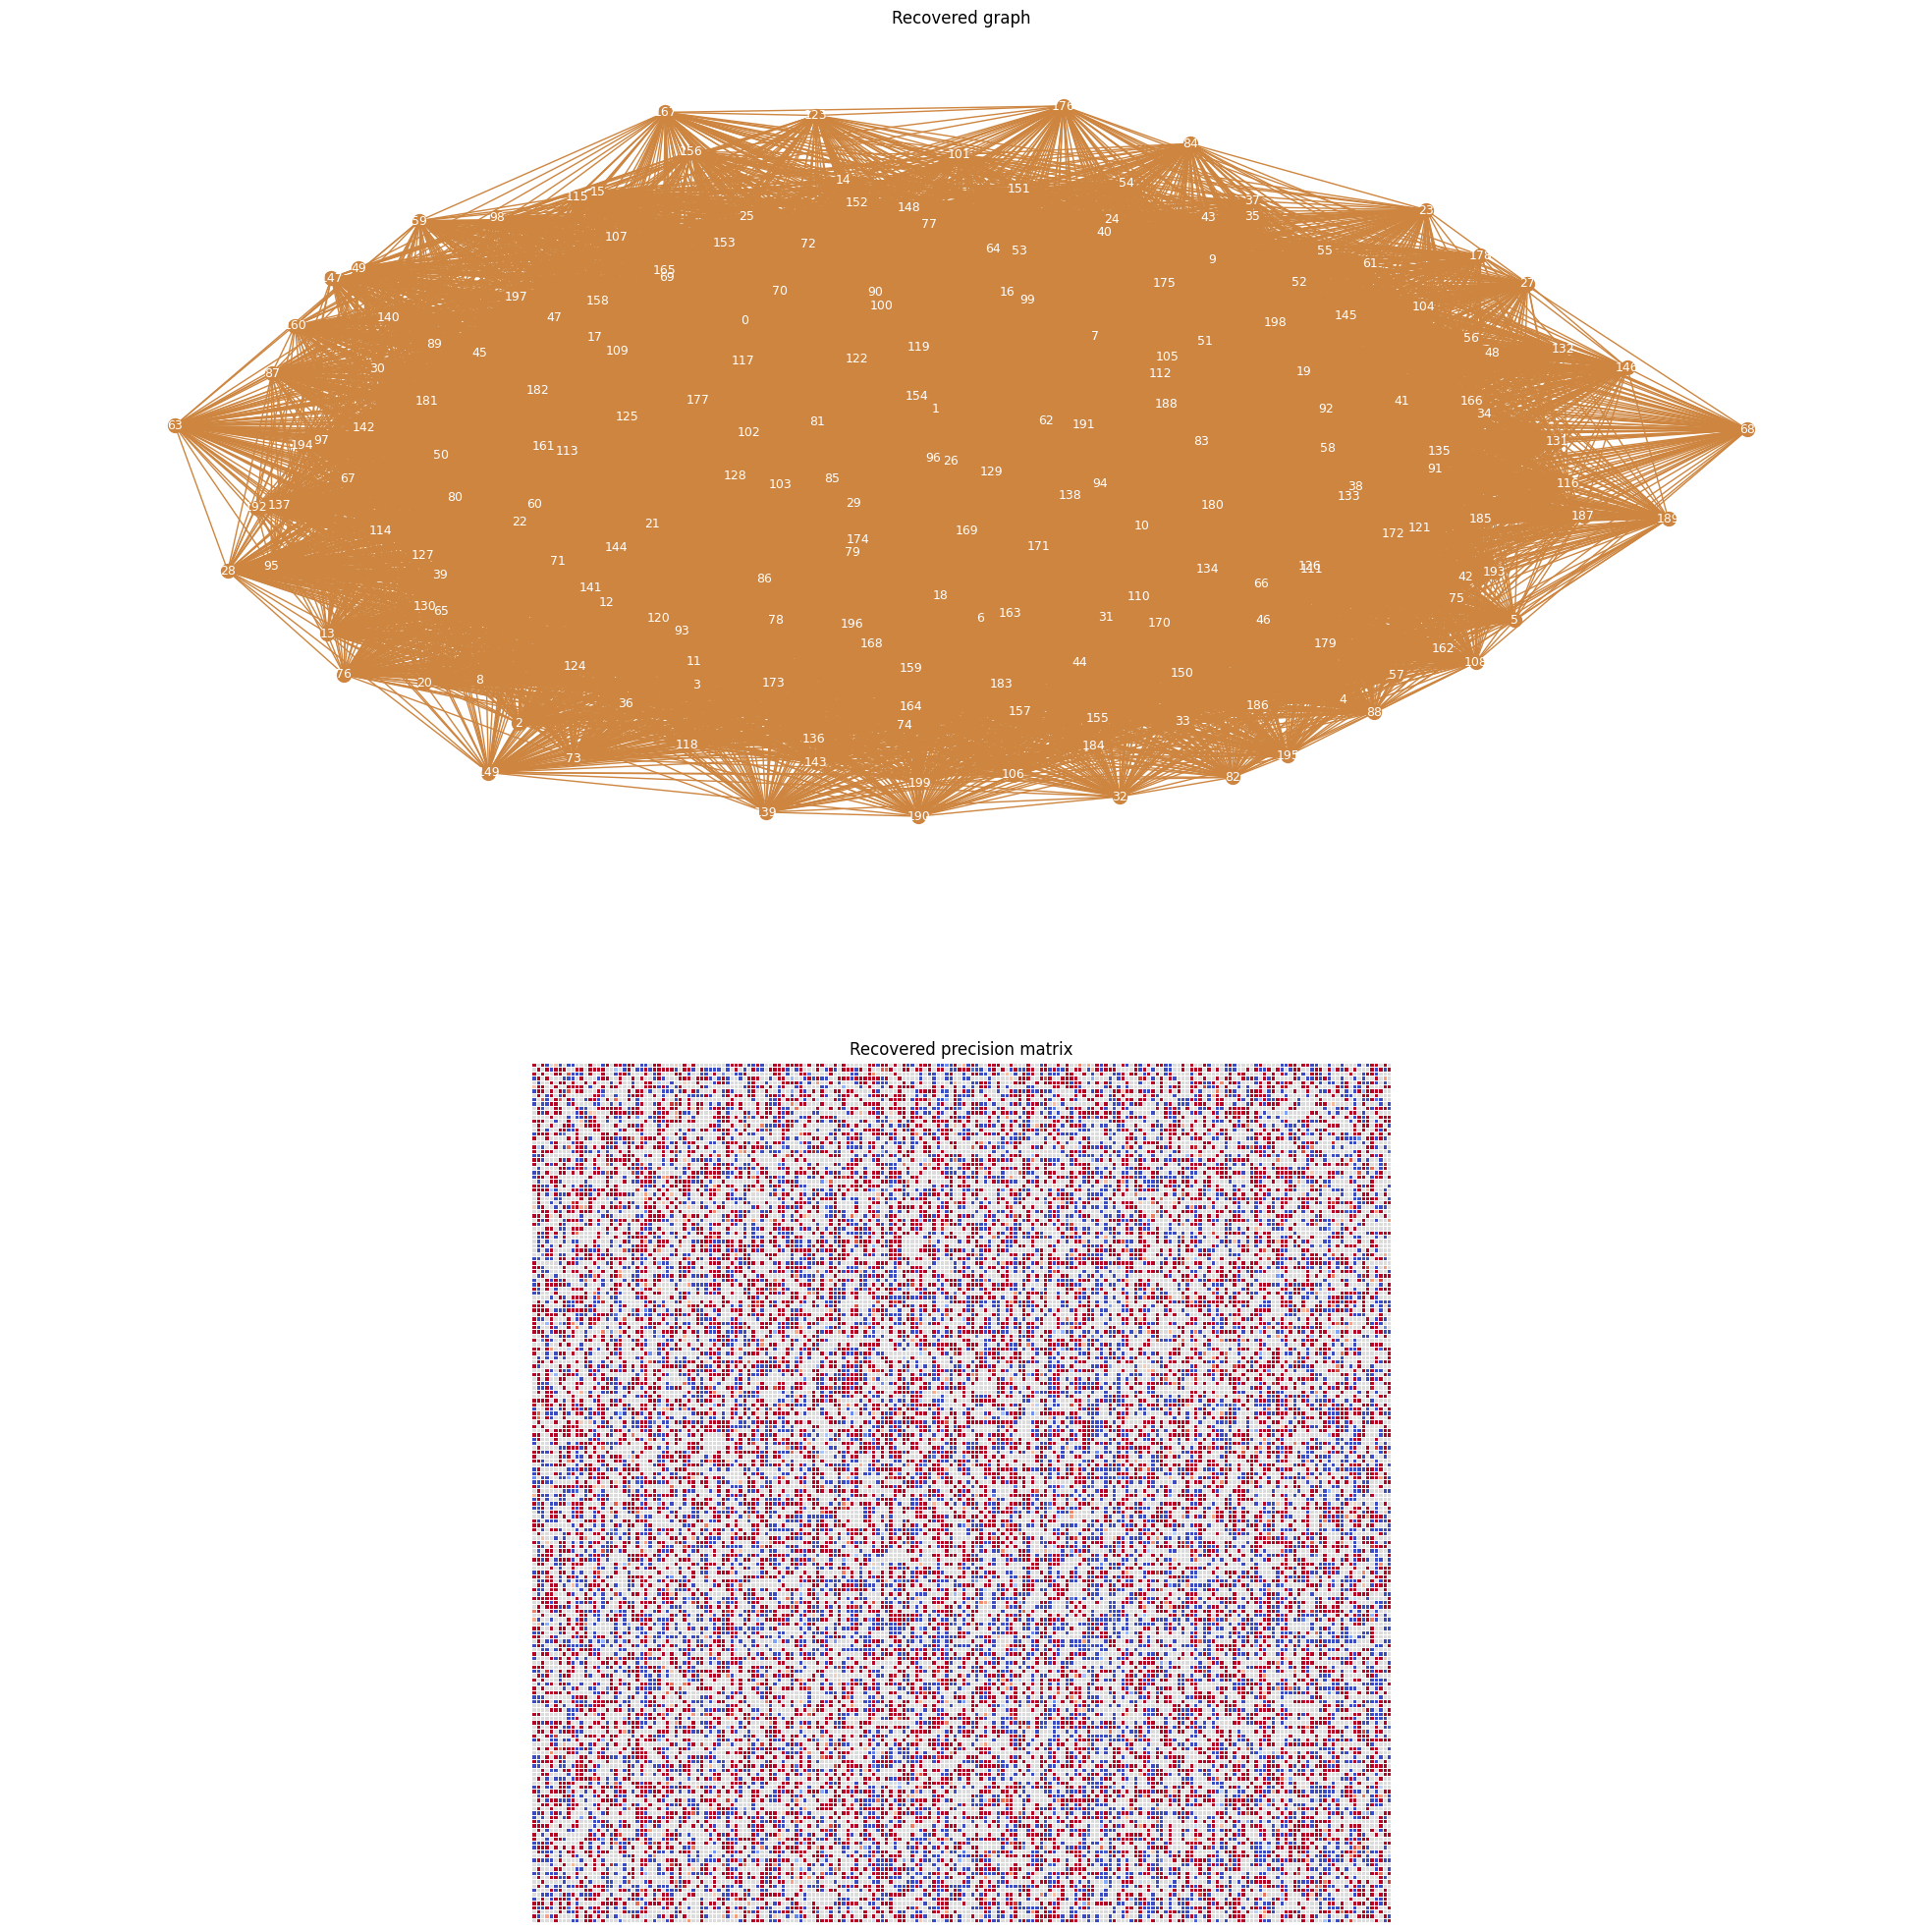

In [134]:
#tmp = P.modelselect_stats

sol = P.solution.precision_
P.solution.calc_adjacency(t = 1e-4)


fig, axs = plt.subplots(2, figsize=(25,25))
node_size = 100
font_size = 9


G1 = nx.from_numpy_array(P.solution.adjacency_)
pos = nx.drawing.layout.spring_layout(G1, seed = 1234)

nx.draw_networkx(G1, pos = pos, node_size = node_size, node_color = "peru", edge_color = "peru", \
               font_size = font_size, font_color = 'white', with_labels = True, ax = axs[0])
axs[0].axis('off')
axs[0].set_title("Recovered graph")


sns.heatmap(sol, cmap = "coolwarm", vmin = -0.5, vmax = 0.5, linewidth = .5, square = True, cbar = False, \
            xticklabels = [], yticklabels = [], ax = axs[1])
axs[1].set_title("Recovered precision matrix")

In [2]:
with open('../data/est_pd_approx.pkl', 'rb') as f:
    est_pd_approx = pickle.load(f)

In [3]:
N = 5964
S = est_pd_approx['R'].to_numpy()

P = glasso_problem(S, N, reg_params = {'lambda1': 0.05}, latent = False, do_scaling = False)
print(P)

 
SINGLE GRAPHICAL LASSO PROBLEM 
Regularization parameters:
{'lambda1': 0.05, 'mu1': None}


In [8]:
lambda1_range = np.logspace(-2, -5, 30)
modelselect_params = {'lambda1_range': lambda1_range}

P.model_selection(modelselect_params = modelselect_params, method = 'eBIC', gamma = 0.1)

# regularization parameters are set to the best ones found during model selection
print(P.reg_params)

ADMM terminated after 492 iterations with status: optimal.
ADMM terminated after 377 iterations with status: optimal.
ADMM terminated after 438 iterations with status: optimal.
ADMM terminated after 562 iterations with status: optimal.
ADMM terminated after 601 iterations with status: optimal.
ADMM terminated after 544 iterations with status: optimal.
ADMM terminated after 674 iterations with status: optimal.
ADMM terminated after 863 iterations with status: optimal.
ADMM terminated after 779 iterations with status: optimal.
ADMM terminated after 804 iterations with status: optimal.
ADMM terminated after 984 iterations with status: optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 915 iterations with status: optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 94

Text(0.5, 1.0, 'Recovered precision matrix')

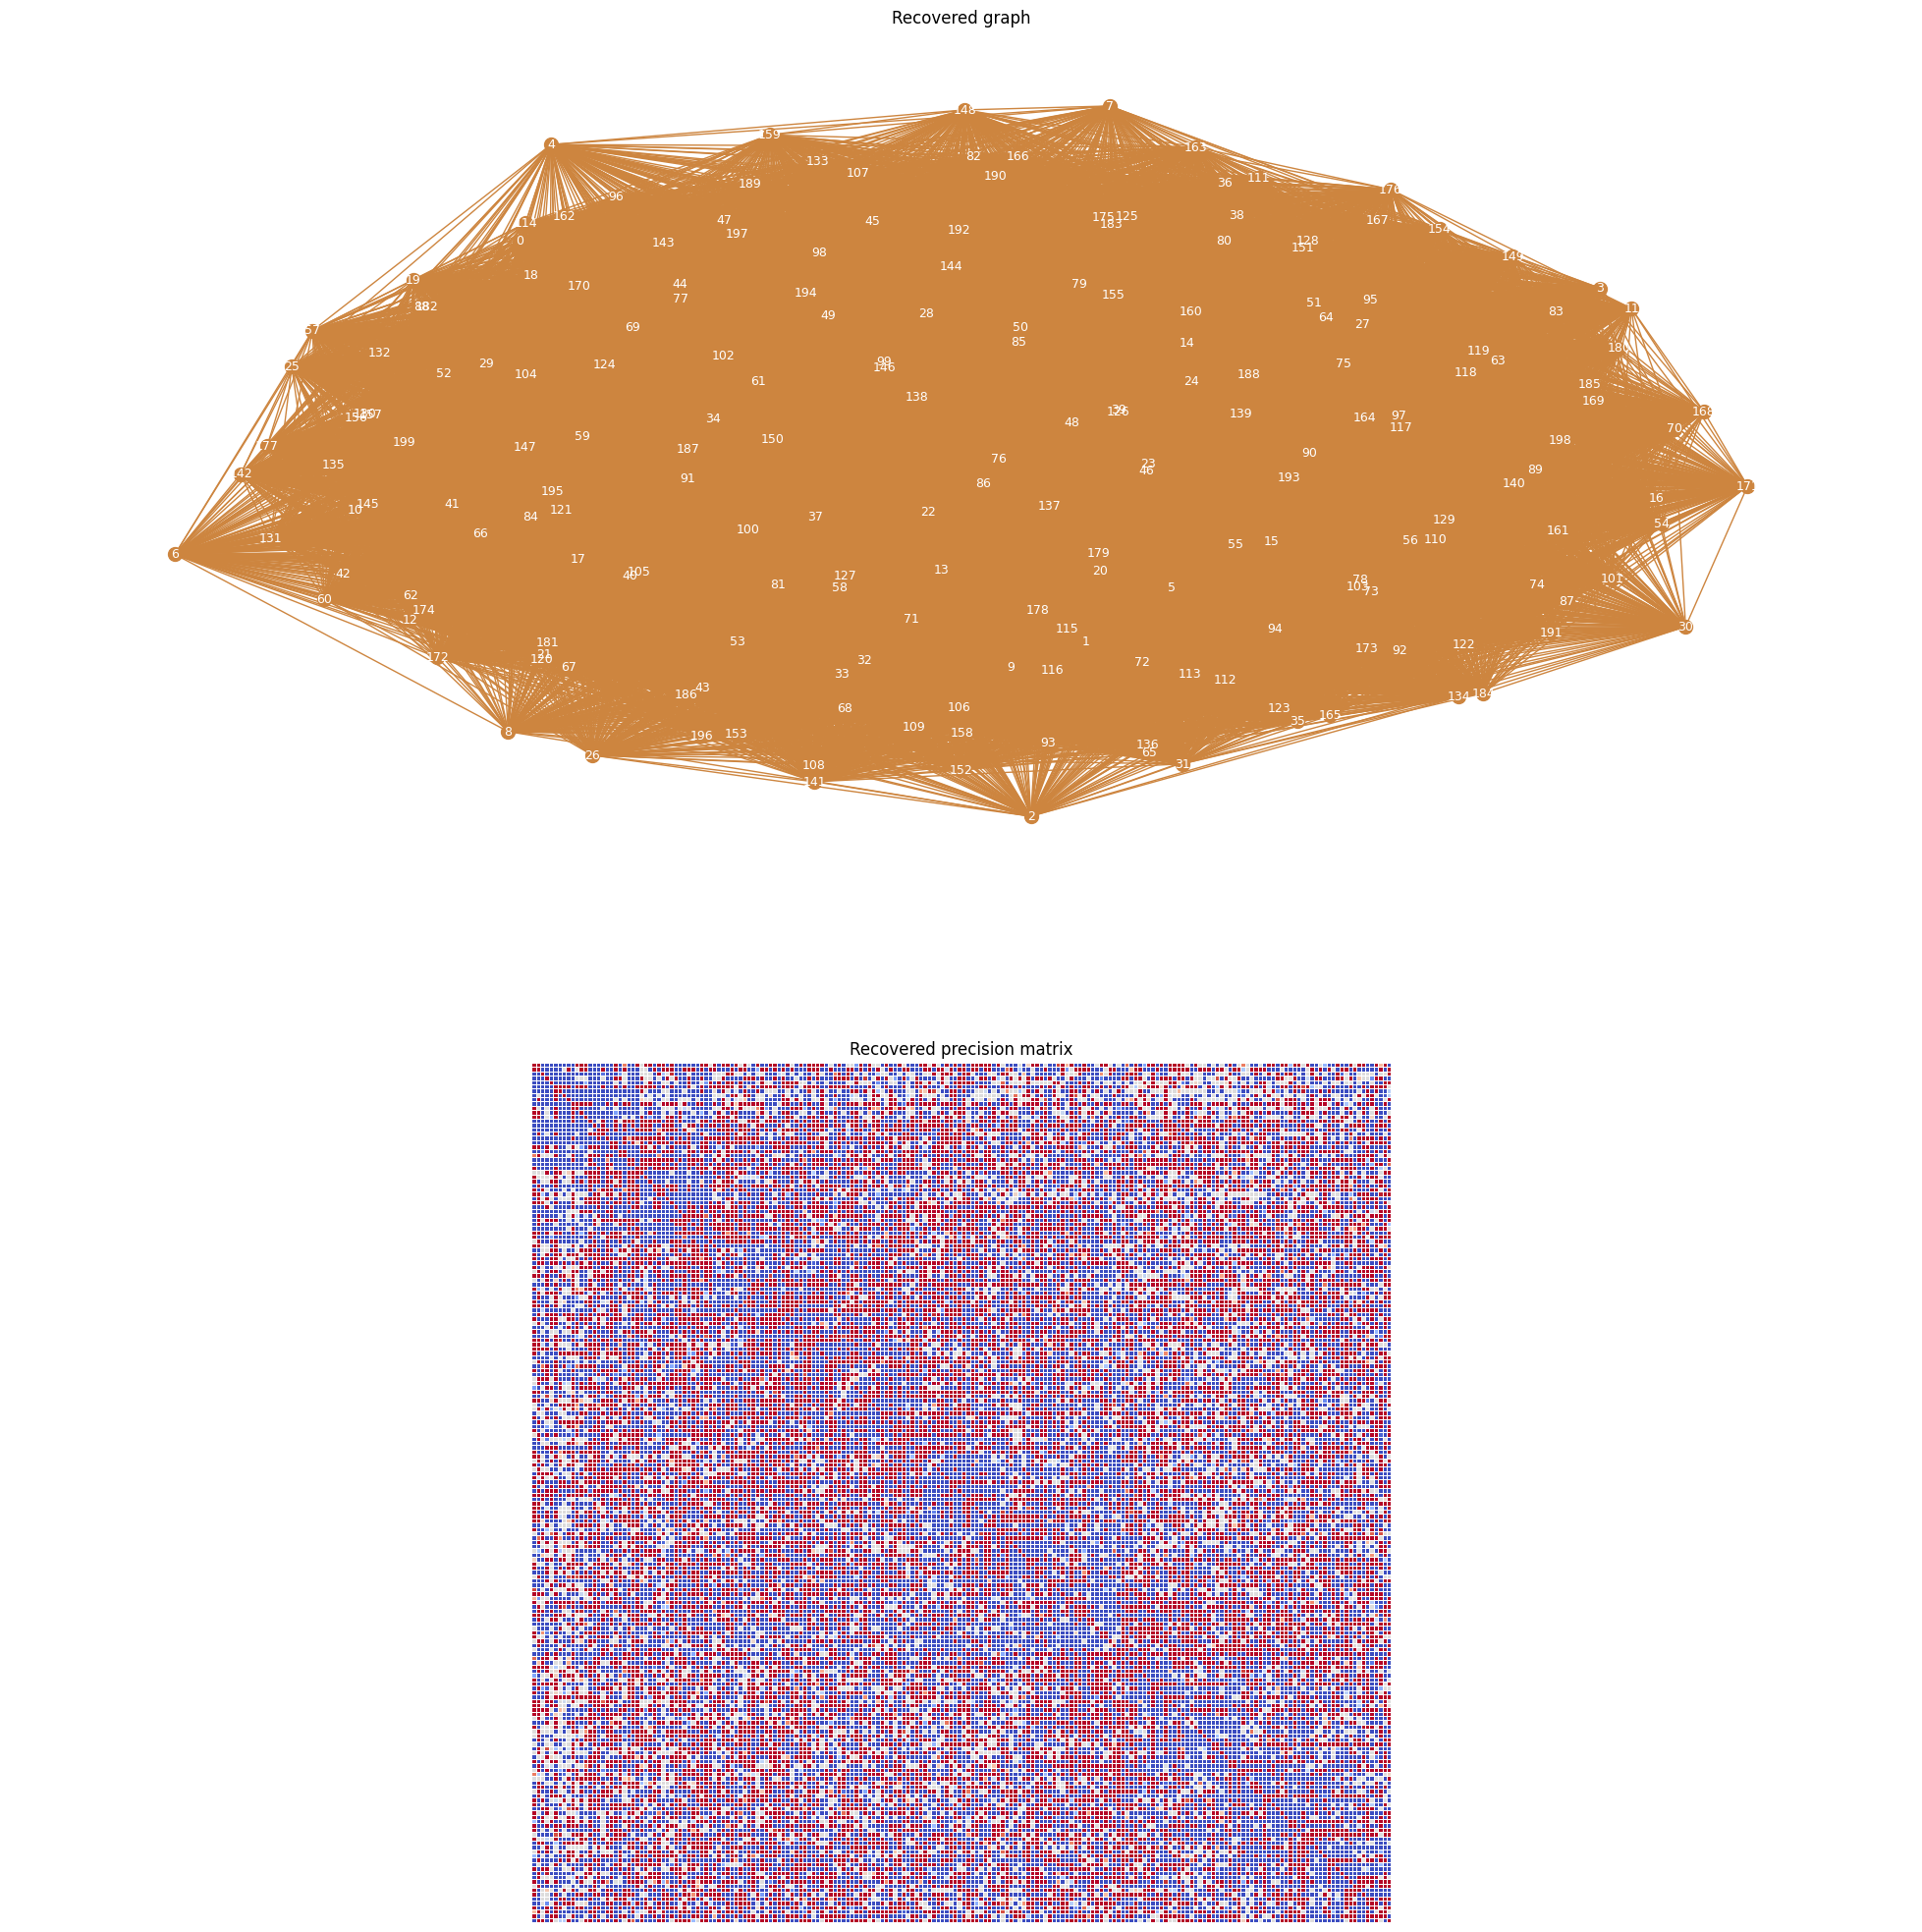

In [9]:
#tmp = P.modelselect_stats

sol = P.solution.precision_
P.solution.calc_adjacency(t = 1e-4)


fig, axs = plt.subplots(2, figsize=(25,25))
node_size = 100
font_size = 9


G1 = nx.from_numpy_array(P.solution.adjacency_)
pos = nx.drawing.layout.spring_layout(G1, seed = 1234)

nx.draw_networkx(G1, pos = pos, node_size = node_size, node_color = "peru", edge_color = "peru", \
               font_size = font_size, font_color = 'white', with_labels = True, ax = axs[0])
axs[0].axis('off')
axs[0].set_title("Recovered graph")


sns.heatmap(sol, cmap = "coolwarm", vmin = -0.5, vmax = 0.5, linewidth = .5, square = True, cbar = False, \
            xticklabels = [], yticklabels = [], ax = axs[1])
axs[1].set_title("Recovered precision matrix")

In [10]:
G1.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 47), (0, 49), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (0, 58), (0, 59), (0, 61), (0, 62), (0, 63), (0, 64), (0, 65), (0, 66), (0, 67), (0, 68), (0, 70), (0, 71), (0, 72), (0, 75), (0, 76), (0, 77), (0, 78), (0, 81), (0, 82), (0, 83), (0, 84), (0, 85), (0, 86), (0, 87), (0, 88), (0, 89), (0, 90), (0, 91), (0, 93), (0, 95), (0, 96), (0, 97), (0, 98), (0, 99), (0, 100), (0, 101), (0, 102), (0, 103), (0, 104), (0, 105), (0, 106), (0, 107), (0, 108), (0, 110), (0, 111), (0, 112), (0, 114), (0, 115), (0, 116), (0, 117), (0, 118), (0, 120), (0, 121), (0, 122), (0, 123

In [13]:
P.solution.adjacency_[0]

172

In [14]:
with open('../data/est_approx.pkl', 'rb') as f:
    est_approx = pickle.load(f)

In [17]:
N = 5964
S = est_approx['R'].to_numpy()

P = glasso_problem(S, N, reg_params = {'lambda1': 0.05}, latent = False, do_scaling = False)
print(P)

 
SINGLE GRAPHICAL LASSO PROBLEM 
Regularization parameters:
{'lambda1': 0.05, 'mu1': None}


In [18]:
lambda1_range = np.logspace(0, -3, 30)
modelselect_params = {'lambda1_range': lambda1_range}

P.model_selection(modelselect_params = modelselect_params, method = 'eBIC', gamma = 0.1)

# regularization parameters are set to the best ones found during model selection
print(P.reg_params)

ADMM terminated after 116 iterations with status: optimal.
ADMM terminated after 115 iterations with status: optimal.
ADMM terminated after 197 iterations with status: optimal.
ADMM terminated after 1000 iterations with status: max iterations reached.
ADMM terminated after 1000 iterations with status: max iterations reached.
ADMM terminated after 1000 iterations with status: max iterations reached.
ADMM terminated after 1000 iterations with status: max iterations reached.
ADMM terminated after 1000 iterations with status: max iterations reached.
ADMM terminated after 1000 iterations with status: max iterations reached.
ADMM terminated after 1000 iterations with status: max iterations reached.
ADMM terminated after 1000 iterations with status: max iterations reached.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 3.92900165024912e-05.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
{'lambda1': 0.11721022975334802, 'mu1': 0}


Text(0.5, 1.0, 'Recovered precision matrix')

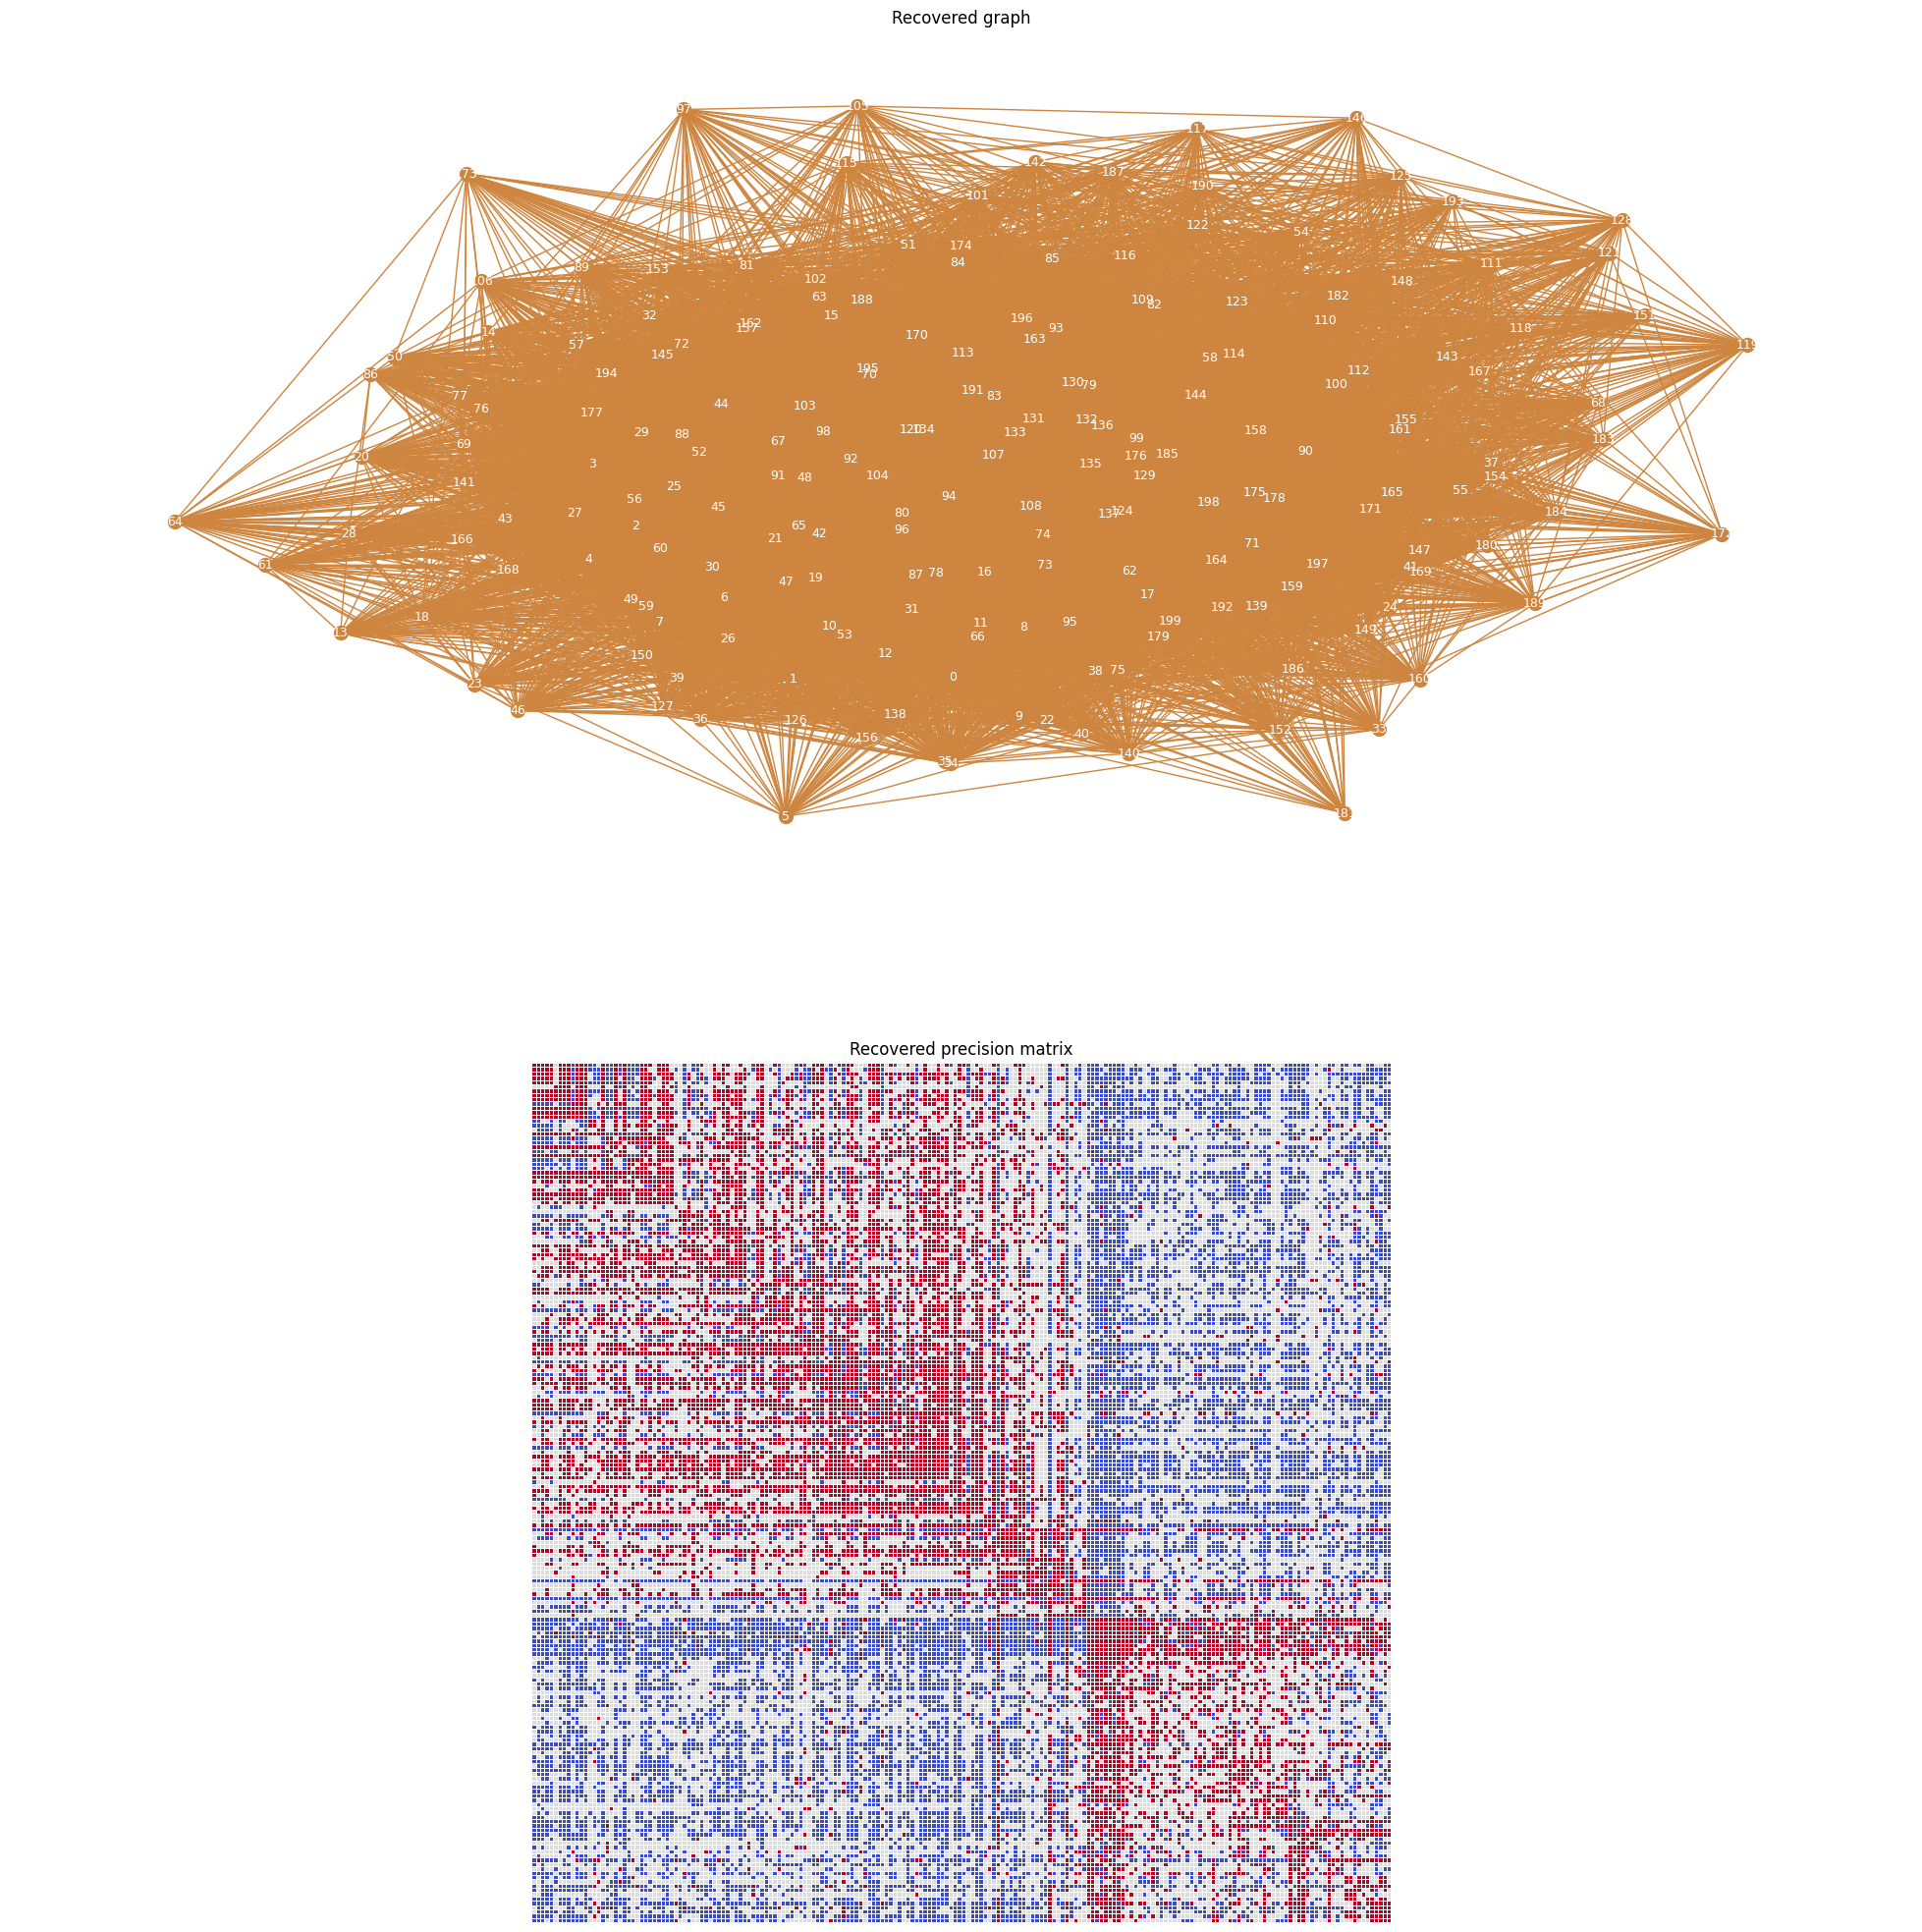

In [19]:
#tmp = P.modelselect_stats

sol = P.solution.precision_
P.solution.calc_adjacency(t = 1e-4)


fig, axs = plt.subplots(2, figsize=(25,25))
node_size = 100
font_size = 9


G1 = nx.from_numpy_array(P.solution.adjacency_)
pos = nx.drawing.layout.spring_layout(G1, seed = 1234)

nx.draw_networkx(G1, pos = pos, node_size = node_size, node_color = "peru", edge_color = "peru", \
               font_size = font_size, font_color = 'white', with_labels = True, ax = axs[0])
axs[0].axis('off')
axs[0].set_title("Recovered graph")


sns.heatmap(sol, cmap = "coolwarm", vmin = -0.5, vmax = 0.5, linewidth = .5, square = True, cbar = False, \
            xticklabels = [], yticklabels = [], ax = axs[1])
axs[1].set_title("Recovered precision matrix")

In [39]:
with open('../data/est_original_50_rnd.pkl', 'rb') as f:
    est = pickle.load(f)

In [40]:
N = 5964
S = est['R'].to_numpy()

P1 = glasso_problem(S, N, reg_params = {'lambda1': 0.05}, latent = False, do_scaling = False)
print(P1)

 
SINGLE GRAPHICAL LASSO PROBLEM 
Regularization parameters:
{'lambda1': 0.05, 'mu1': None}


In [41]:
lambda1_range = np.logspace(0, -5, 50)[1:]
modelselect_params = {'lambda1_range': lambda1_range}

P1.model_selection(modelselect_params = modelselect_params, method = 'eBIC', gamma = 0.1)

# regularization parameters are set to the best ones found during model selection
print(P1.reg_params)

ADMM terminated after 1000 iterations with status: max iterations reached.
ADMM terminated after 1000 iterations with status: primal optimal.


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 2.0.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 2.0.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 1.0.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 1.0.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal opti

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 1.1328125.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 1.1328125.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 1.03125.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is

ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 256.0.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 256.0.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 512.0.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 512.0.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
{'lambda1': 0.79060432109077, 'mu1': 0}


Text(0.5, 1.0, 'Recovered precision matrix')

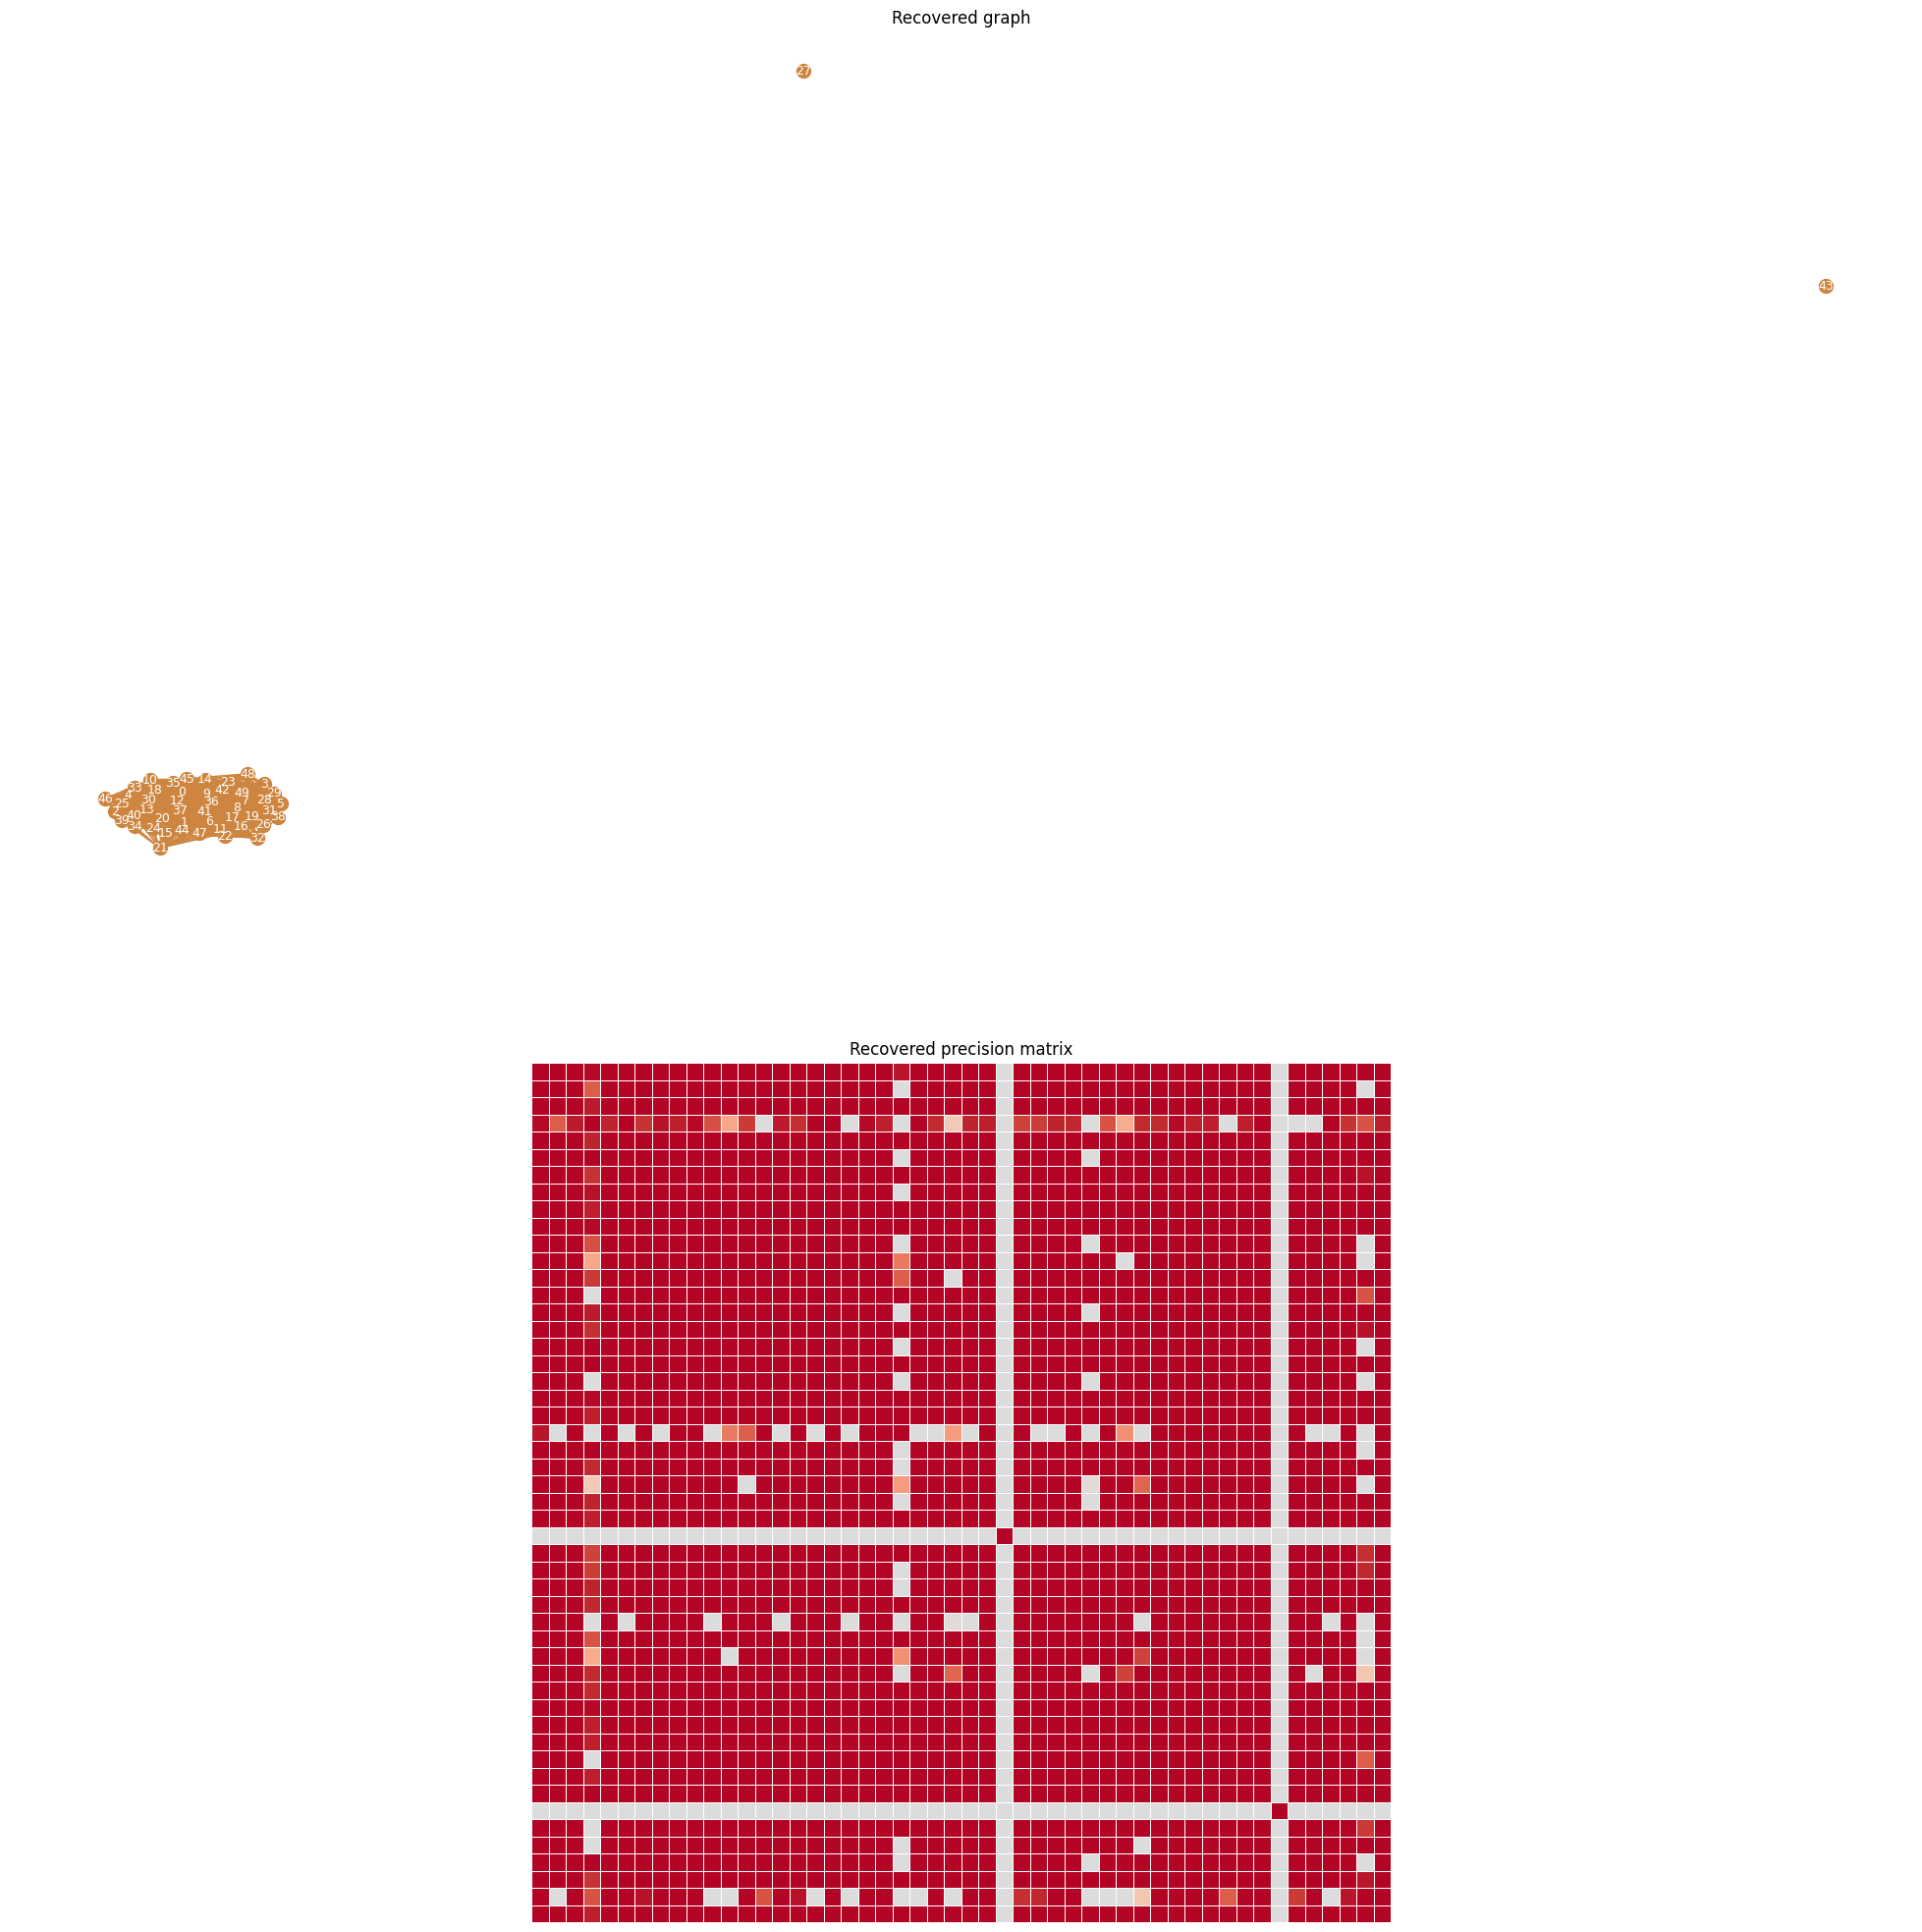

In [43]:
#tmp = P.modelselect_stats

sol = P1.solution.precision_
P1.solution.calc_adjacency(t = 1e-4)


fig, axs = plt.subplots(2, figsize=(25,25))
node_size = 100
font_size = 9


G1 = nx.from_numpy_array(P1.solution.adjacency_)
pos = nx.drawing.layout.spring_layout(G1, seed = 1234)

nx.draw_networkx(G1, pos = pos, node_size = node_size, node_color = "peru", edge_color = "peru", \
               font_size = font_size, font_color = 'white', with_labels = True, ax = axs[0])
axs[0].axis('off')
axs[0].set_title("Recovered graph")


sns.heatmap(sol, cmap = "coolwarm", vmin = -0.5, vmax = 0.5, linewidth = .5, square = True, cbar = False, \
            xticklabels = [], yticklabels = [], ax = axs[1])
axs[1].set_title("Recovered precision matrix")

In [33]:
with open('../data/est_pd_original_50_rnd.pkl', 'rb') as f:
    est_pd = pickle.load(f)

In [34]:
N = 5964
S = est_pd['R'].to_numpy()

P = glasso_problem(S, N, reg_params = {'lambda1': 0.05}, latent = False, do_scaling = False)
print(P)

 
SINGLE GRAPHICAL LASSO PROBLEM 
Regularization parameters:
{'lambda1': 0.05, 'mu1': None}


In [35]:
lambda1_range = np.logspace(0, -5, 50)[1:]
modelselect_params = {'lambda1_range': lambda1_range}

P.model_selection(modelselect_params = modelselect_params, method = 'eBIC', gamma = 0.1)

# regularization parameters are set to the best ones found during model selection
print(P.reg_params)

ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 27 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 27 iterations with status: optimal.
ADMM terminated after 26 iterations with status: optimal.
ADMM terminated after 12 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 41 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 53 iterations with status: optimal.
ADMM terminated after 11 iterations with status: optimal.
ADMM terminated after 74 iterations with status: optimal.
ADMM terminated afte

Text(0.5, 1.0, 'Recovered precision matrix')

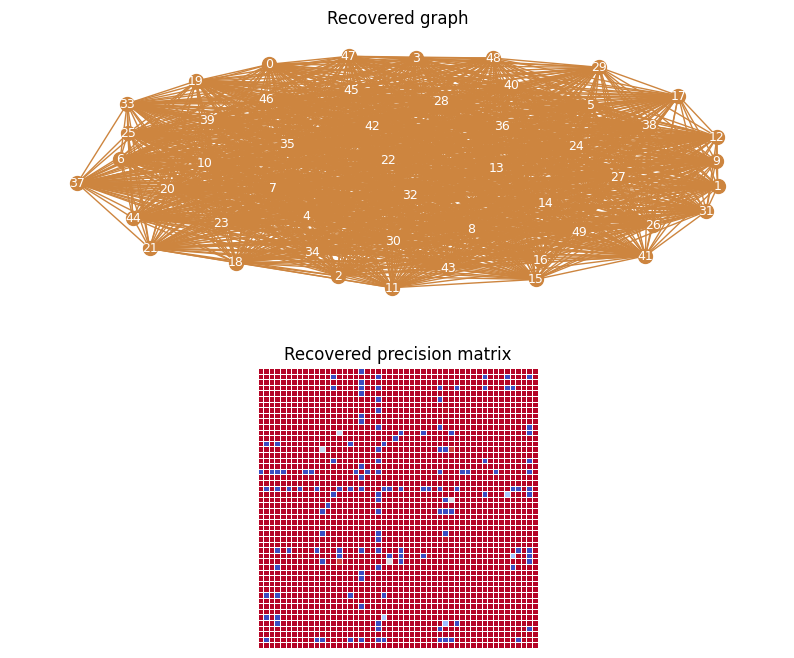

In [36]:
#tmp = P.modelselect_stats

sol = P.solution.precision_
P.solution.calc_adjacency(t = 1e-4)


fig, axs = plt.subplots(2, figsize=(10,8))
node_size = 100
font_size = 9


G1 = nx.from_numpy_array(P.solution.adjacency_)
pos = nx.drawing.layout.spring_layout(G1, seed = 1234)

nx.draw_networkx(G1, pos = pos, node_size = node_size, node_color = "peru", edge_color = "peru", \
               font_size = font_size, font_color = 'white', with_labels = True, ax = axs[0])
axs[0].axis('off')
axs[0].set_title("Recovered graph")


sns.heatmap(sol, cmap = "coolwarm", vmin = -0.5, vmax = 0.5, linewidth = .5, square = True, cbar = False, \
            xticklabels = [], yticklabels = [], ax = axs[1])
axs[1].set_title("Recovered precision matrix")